In [13]:
import pandas as pd

df = pd.read_csv("Merged_WTA_Env_with_region.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Merged_WTA_Env_with_region.csv'

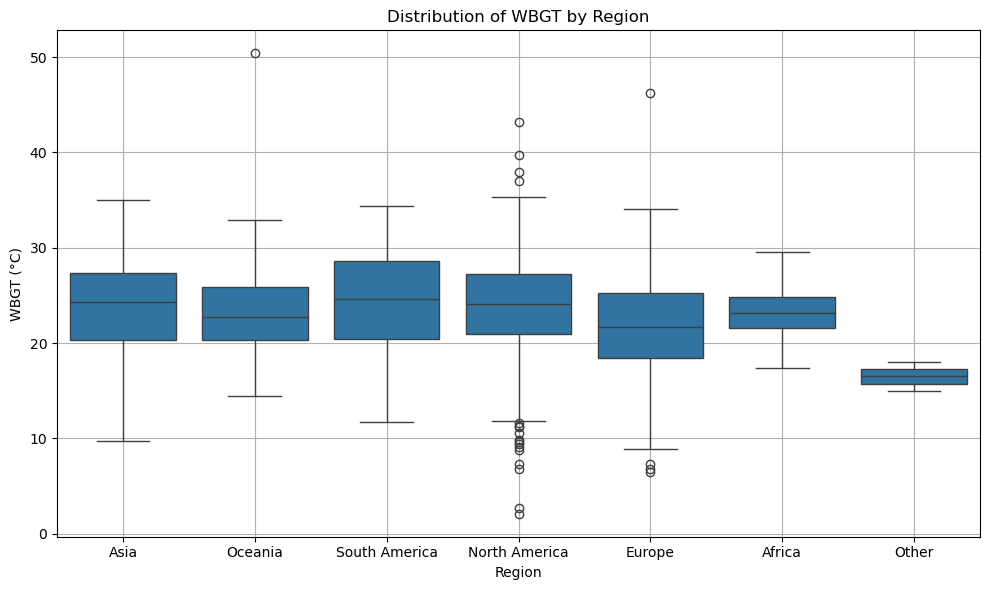

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Region", y="WBGT")
plt.title("Distribution of WBGT by Region")
plt.ylabel("WBGT (°C)")
plt.xlabel("Region")
plt.grid(True)
plt.tight_layout()
plt.show()

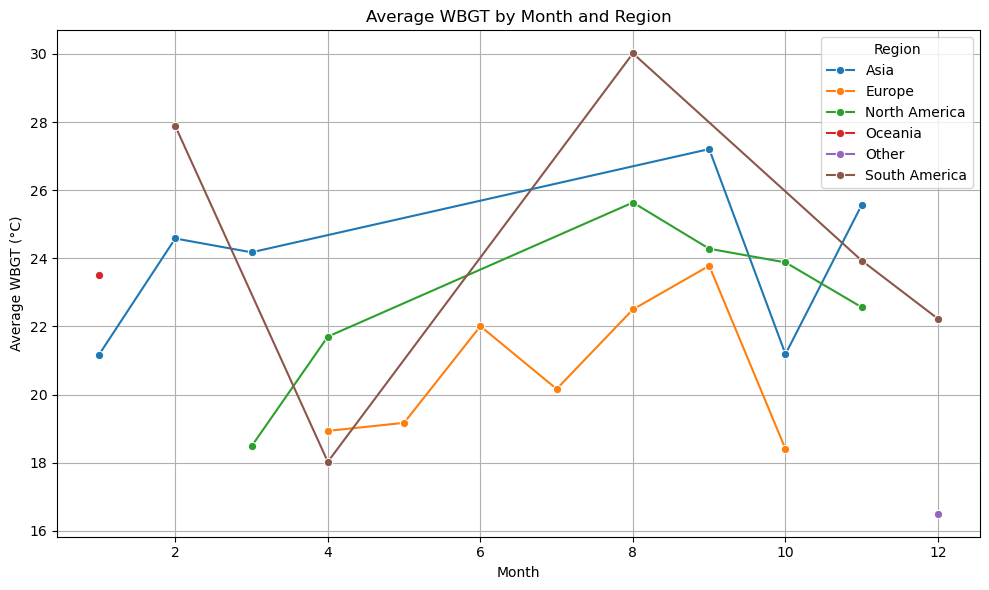

In [ ]:
# Extract month from Date if not already done
df["Month"] = pd.to_datetime(df["Date"], errors="coerce").dt.month

# Group by Region and Month to compute averages
monthly_avg = df.groupby(["Region", "Month"])["WBGT"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, x="Month", y="WBGT", hue="Region", marker="o")
plt.title("Average WBGT by Month and Region")
plt.ylabel("Average WBGT (°C)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

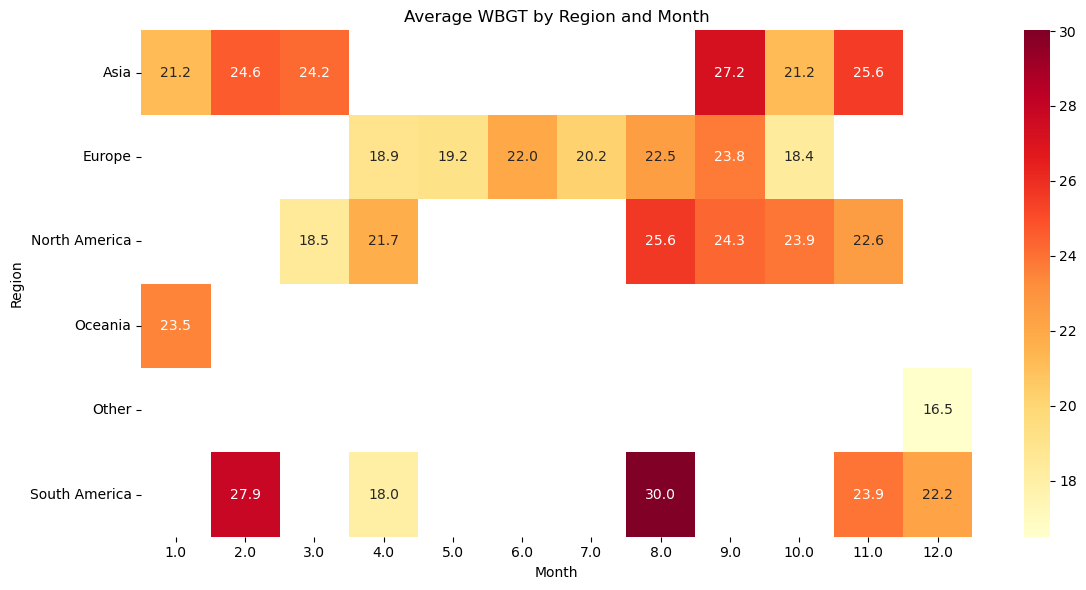

In [ ]:
# Pivot the data
heatmap_data = monthly_avg.pivot(index="Region", columns="Month", values="WBGT")

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".1f")
plt.title("Average WBGT by Region and Month")
plt.xlabel("Month")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

C:\Users\samer\AppData\Local\Temp\ipykernel_23920\477561696.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Region", order=df["Region"].value_counts().index, palette="Blues_d")


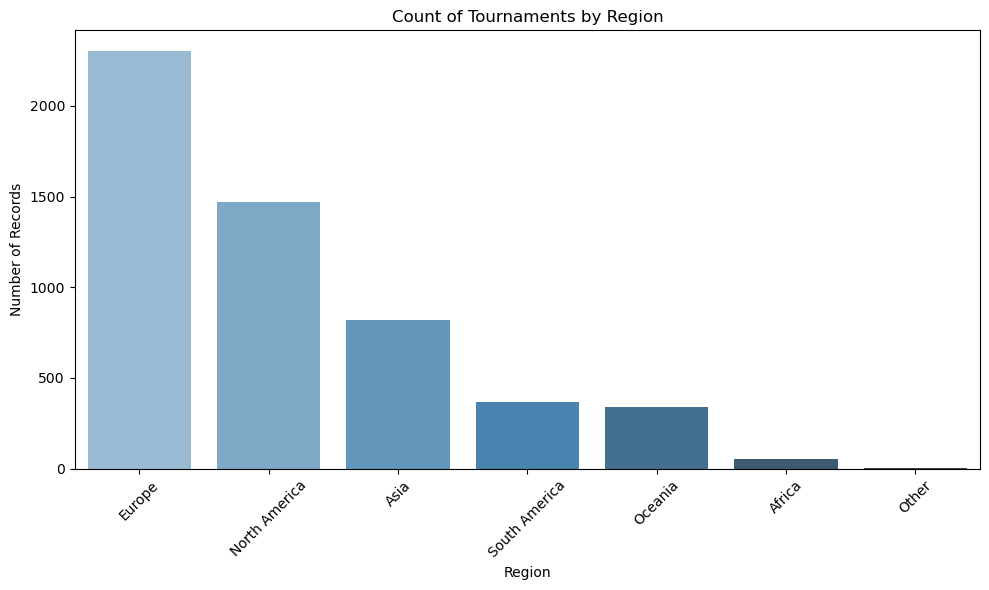

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Region", order=df["Region"].value_counts().index, palette="Blues_d")
plt.title("Count of Tournaments by Region")
plt.xlabel("Region")
plt.ylabel("Number of Records")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\samer\AppData\Local\Temp\ipykernel_23920\2093945568.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=europe_monthly, x="Month", y="WBGT", palette="OrRd")


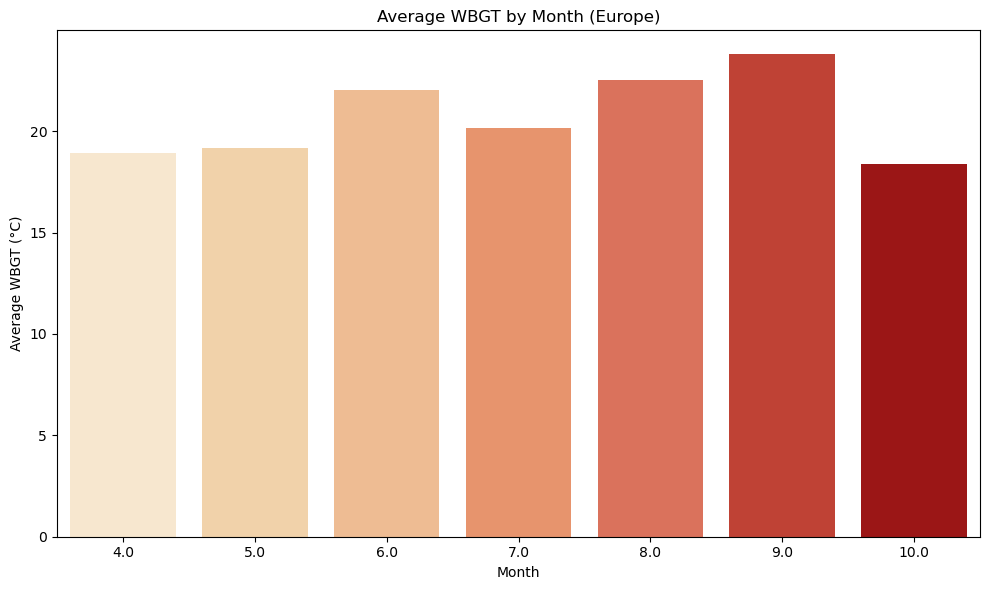

In [ ]:
# Make sure Month column exists
df["Month"] = pd.to_datetime(df["Date"], errors="coerce").dt.month

# Filter for Europe and compute mean WBGT per month
europe_monthly = df[df["Region"] == "Europe"].groupby("Month")["WBGT"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=europe_monthly, x="Month", y="WBGT", palette="OrRd")
plt.title("Average WBGT by Month (Europe)")
plt.xlabel("Month")
plt.ylabel("Average WBGT (°C)")
plt.tight_layout()
plt.show()

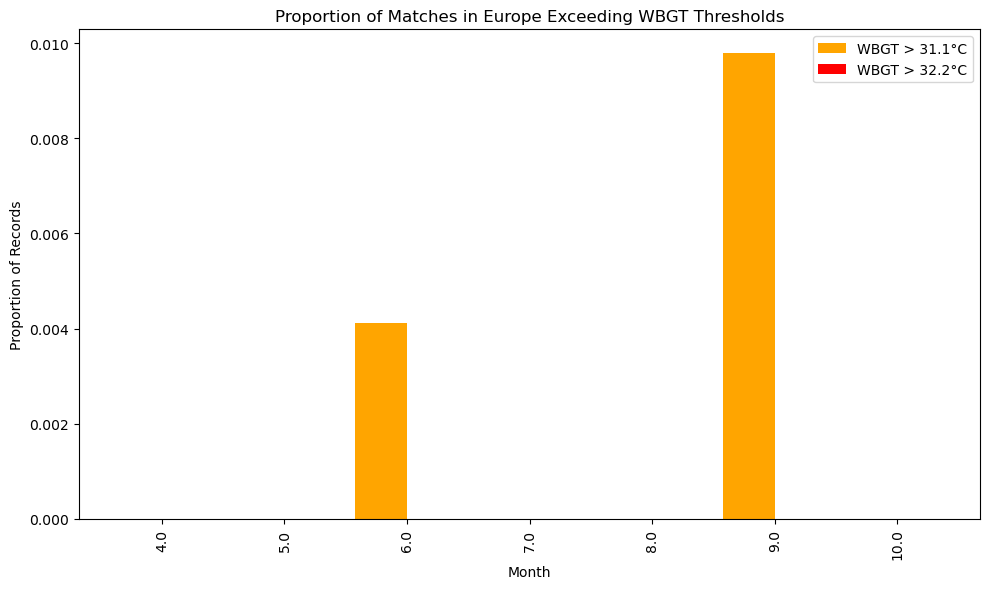

In [ ]:
# Add a column flagging if WBGT exceeds thresholds
df["WBGT > 31.1"] = df["WBGT"] > 31.1
df["WBGT > 32.2"] = df["WBGT"] > 32.2

# Group by month in Europe
europe_flags = df[df["Region"] == "Europe"].groupby("Month")[["WBGT > 31.1", "WBGT > 32.2"]].mean().reset_index()

# Plot both thresholds
europe_flags.plot(
    x="Month", kind="bar", figsize=(10, 6), color=["orange", "red"], width=0.85
)
plt.title("Proportion of Matches in Europe Exceeding WBGT Thresholds")
plt.xlabel("Month")
plt.ylabel("Proportion of Records")
plt.legend(["WBGT > 31.1°C", "WBGT > 32.2°C"])
plt.tight_layout()
plt.show()